# EXPLORATION 10. 카메라 스티커앱 만들기 첫걸음

---

## Import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import dlib

## Image and model

In [2]:
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
landmark_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/landmark.png'

In [3]:
model_path = os.getenv(
    'HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

## Face landmark

In [4]:
img_bgr = cv2.imread(image_path)
# img_bgr = cv2.resize(img_bgr, (640, 480))
# img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

### hog detector

In [5]:
detector_hog = dlib.get_frontal_face_detector()

In [6]:
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

rectangles[[(297, 400) (759, 862)]]


In [7]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

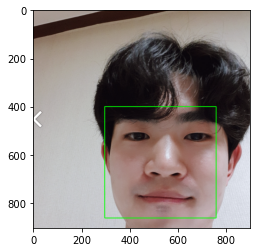

In [8]:
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Landmark localization

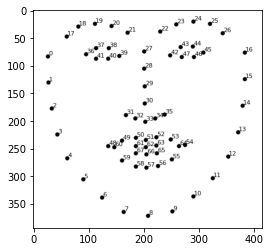

In [9]:
landmark_img = cv2.imread(landmark_image_path)
plt.imshow(landmark_img)
plt.show()

In [10]:
landmark_predictor = dlib.shape_predictor(model_path)

In [11]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

In [12]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 3, (0, 255, 255), -1) # yellow

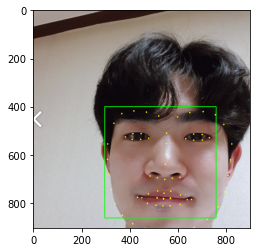

In [13]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Sticker position

In [23]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1] - y

In [24]:
    print(dlib_rect)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

[(297, 400) (759, 862)]
(x,y) : (315,526)
(w,h) : (466,250)


## Cat whiskers

In [26]:
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(250, 466, 3)


In [32]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

In [33]:
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

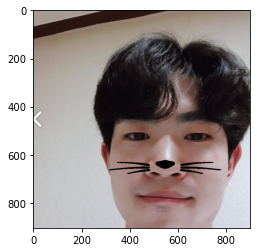

In [34]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Report

landmark에서 2번의 x좌표와 36번의 y의 좌표를 sticker사진의 left-top 좌표로 사용했습니다.  
sticker사진의 width 는 landmark에서 2번의 x좌표와 landmark에서 30번의 x좌표 사이의 거리를 구한 후, 두배를 했습니다. height는 landmark에서 36번의 y좌표와 landmark에서 48번의 y좌표 사이의 거리를 이용했습니다.

<br>

- sticker의 left-top  
    x = landmark 2번의 x좌표  
    y = landmark 36번의 y좌표
    
<br>

- sticker의 width, height  
    width = (landmark에서 30번의 x좌표 - landmark에서 2번의 x좌표) * 2
    height = landmark에서 48번의 y좌표 - landmark에서 36번의 x좌표